In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [16]:
# Define dataset paths
train_dir = "/Users/samenergy/Documents/Projects/PlantDiseaseDetectionApp/Backend/Data/train"

valid_dir = "/Users/samenergy/Documents/Projects/PlantDiseaseDetectionApp/Backend/Data/valid"


In [17]:
# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir, labels="inferred", label_mode="categorical",
    batch_size=64, image_size=(128, 128), shuffle=True
)

Found 70295 files belonging to 38 classes.


In [18]:
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_dir, labels="inferred", label_mode="categorical",
    batch_size=64, image_size=(128, 128), shuffle=True
)

Found 17572 files belonging to 38 classes.


In [19]:

# Get class names
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print("Class names:", class_names)

Number of classes: 38
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotte

In [20]:
# Normalize images (rescaling to [0,1])
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

In [21]:
# Define the CNN Model
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)),
    Conv2D(32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(256, kernel_size=3, activation='relu', padding='same'),
    Conv2D(256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(512, kernel_size=3, activation='relu', padding='same'),
    Conv2D(512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Dropout(0.25),
    Flatten(),
    Dense(1500, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])




In [22]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [24]:
# Train the model
epochs = 10
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=epochs)


Epoch 1/10
1099/1099 [==============================] - 1030s 936ms/step - loss: 2.1445 - accuracy: 0.3827 - val_loss: 1.0053 - val_accuracy: 0.6976
Epoch 2/10
1099/1099 [==============================] - 1001s 911ms/step - loss: 0.8523 - accuracy: 0.7345 - val_loss: 0.5528 - val_accuracy: 0.8276
Epoch 3/10
1099/1099 [==============================] - 1032s 939ms/step - loss: 0.5305 - accuracy: 0.8304 - val_loss: 0.3699 - val_accuracy: 0.8845
Epoch 4/10
1099/1099 [==============================] - 1026s 934ms/step - loss: 0.3849 - accuracy: 0.8755 - val_loss: 0.2709 - val_accuracy: 0.9116
Epoch 5/10
1099/1099 [==============================] - 1032s 939ms/step - loss: 0.2893 - accuracy: 0.9052 - val_loss: 0.2342 - val_accuracy: 0.9248
Epoch 6/10
1099/1099 [==============================] - 1030s 937ms/step - loss: 0.2295 - accuracy: 0.9243 - val_loss: 0.2106 - val_accuracy: 0.9319
Epoch 7/10
1099/1099 [==============================] - 1024s 931ms/step - loss: 0.1911 - accuracy: 0.9367

In [25]:
# Evaluate on training set
train_loss, train_acc = model.evaluate(train_dataset)
print(f"Training Loss: {train_loss}, Training Accuracy: {train_acc}")


1099/1099 [==============================] - 256s 233ms/step - loss: 0.0639 - accuracy: 0.9782
Training Loss: 0.06392232328653336, Training Accuracy: 0.978163480758667


In [26]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(valid_dataset)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

275/275 [==============================] - 64s 232ms/step - loss: 0.1703 - accuracy: 0.9441
Validation Loss: 0.1703166514635086, Validation Accuracy: 0.9441156387329102


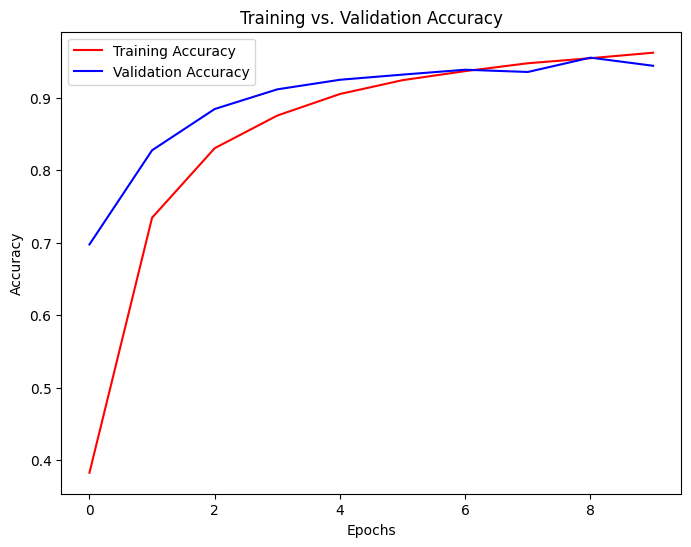

In [27]:
# Plot accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.show()




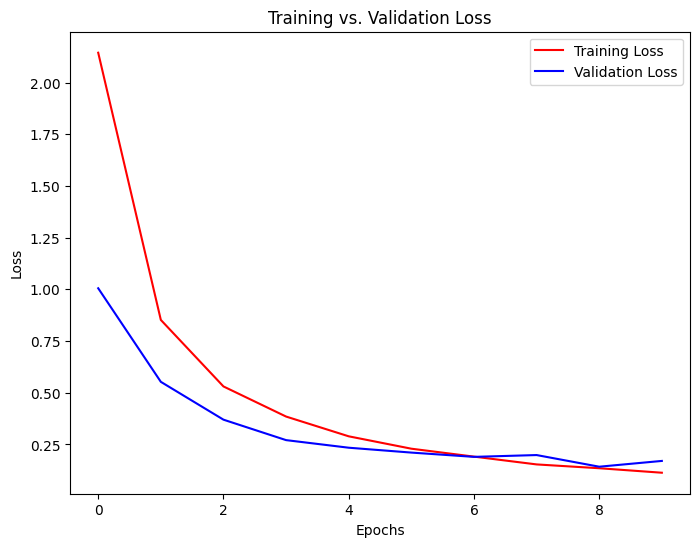

In [28]:
# Plot loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.show()

In [29]:
model.save("plant_disease_model.keras")




In [30]:
import pickle

with open("plant_disease_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [31]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in valid_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

2/2 [==============================] - 0s 21ms/step


In [32]:
# Generate classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.91      0.93       504
                                 Apple___Black_rot       0.96      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.94      0.95       440
                                   Apple___healthy       0.92      0.96      0.94       502
                               Blueberry___healthy       0.95      0.97      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.82      0.96      0.88       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.95      0.

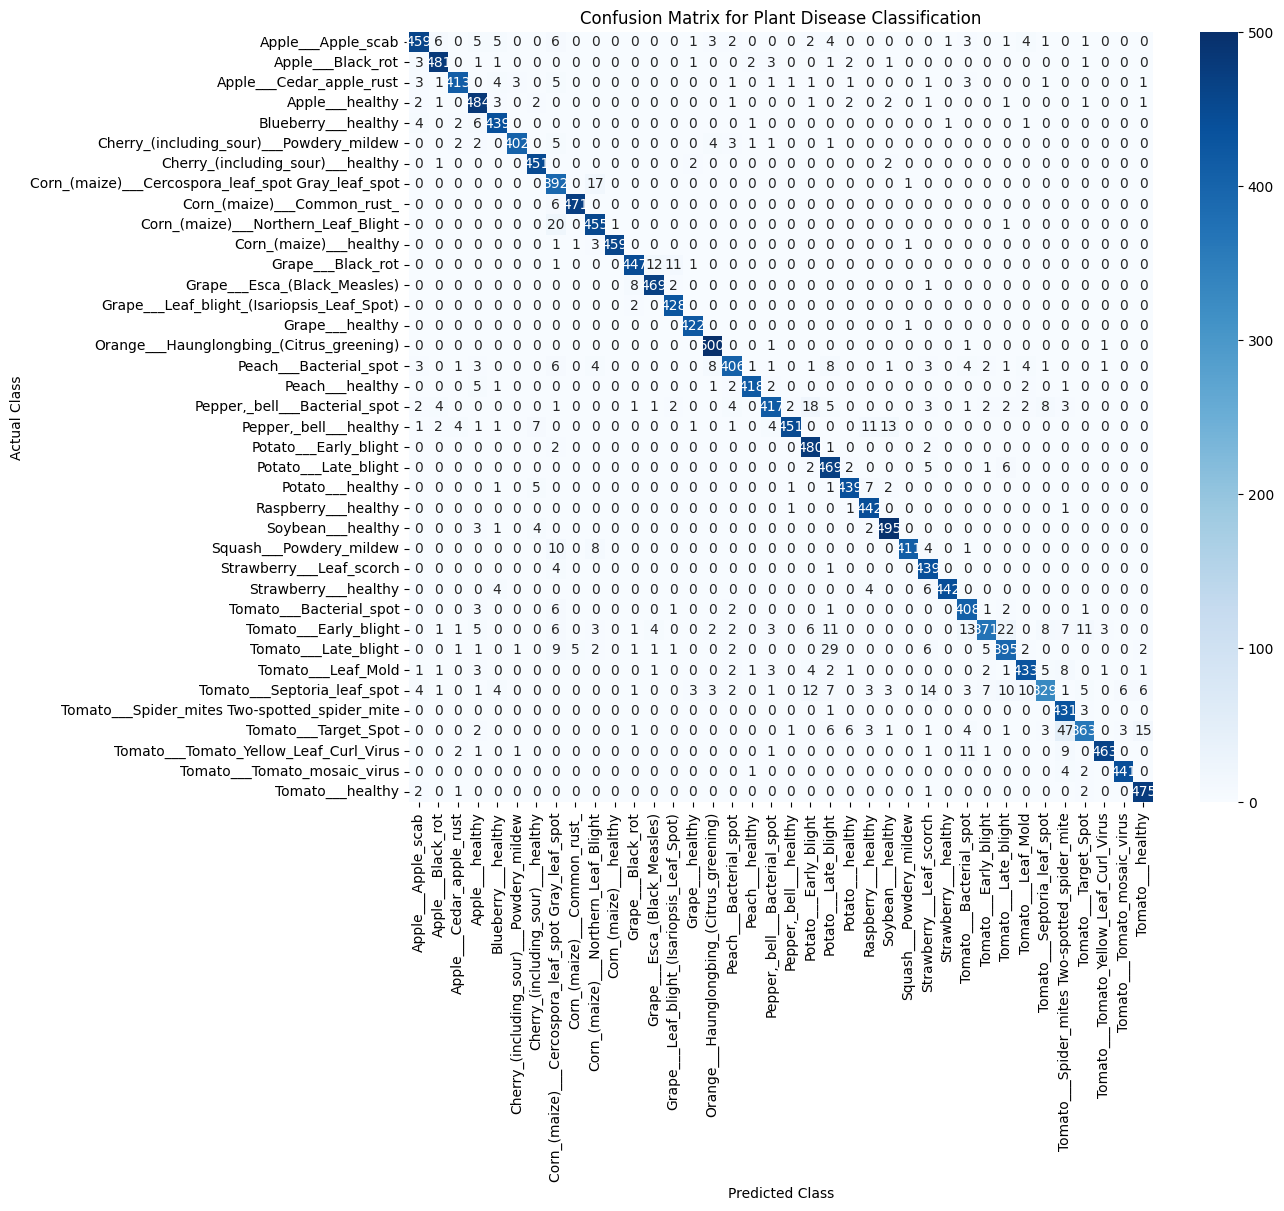

In [33]:
# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for Plant Disease Classification")
plt.show()